
1. Install spark and run a worker on your machine

2. Using Spark, inspect the Bank Marketing dataset

 a.  Print 10 random rows from the dataset

In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import rand

# Initialize Spark session
spark = SparkSession.builder.appName("BankMarketingAnalysis").getOrCreate()

# Load the dataset (update path as needed)
df = spark.read.csv("bank-marketing.csv", header=True, inferSchema=True)

# Print 10 random rows
df.orderBy(rand()).show(10, truncate=False)


+---+------------+--------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+-------+
|age|job         |marital |education|default|balance|housing|loan|contact |day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+------------+--------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+-------+
|52 |admin.      |married |secondary|no     |1113   |no     |yes |cellular|8  |jul  |83      |1       |-1   |0       |unknown |no     |
|26 |management  |single  |tertiary |no     |1094   |yes    |no  |cellular|8  |sep  |137     |1       |-1   |0       |unknown |yes    |
|27 |technician  |single  |secondary|yes    |0      |no     |yes |cellular|8  |jul  |732     |1       |-1   |0       |unknown |yes    |
|49 |admin.      |married |secondary|no     |167    |no     |yes |cellular|9  |jul  |51      |1       |-1   |0       |unknown |no     |
|33 |management  |single  |tertiary |no     |224

2.b. What are the relative proportions of no and yes for deposit feature? (inspect also other qualitative variables)

In [17]:
print('proportion of \'yes\' is ', df.filter(df["deposit"] == "yes").count() / df.count())


proportion of 'yes' is  0.4738398136534671


2. c. Get descriptive statistics for numerical variables

In [24]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [ ]:
numerical_cols = [col for col, dtype in df.dtypes if dtype in ['int', 'double', 'float']]
# Select numerical columns and then describe
df.select(numerical_cols).describe().show(truncate=False)

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|age               |balance           |day               |duration          |campaign          |pdays             |previous          |
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|count  |11162             |11162             |11162             |11162             |11162             |11162             |11162             |
|mean   |41.231947679627304|1528.5385235620856|15.658036194230425|371.99381831213043|2.508421429851281 |51.33040673714388 |0.8325568894463358|
|stddev |11.913369192215518|3225.413325946149 |8.420739541006462 |347.12838571630687|2.7220771816614824|108.75828197197717|2.292007218670508 |
|min    |18                |-6847             |1                 |2                 |1                 |-1                |0                 |

2. d. Use relevant visualizations to inspect variables and relations between them

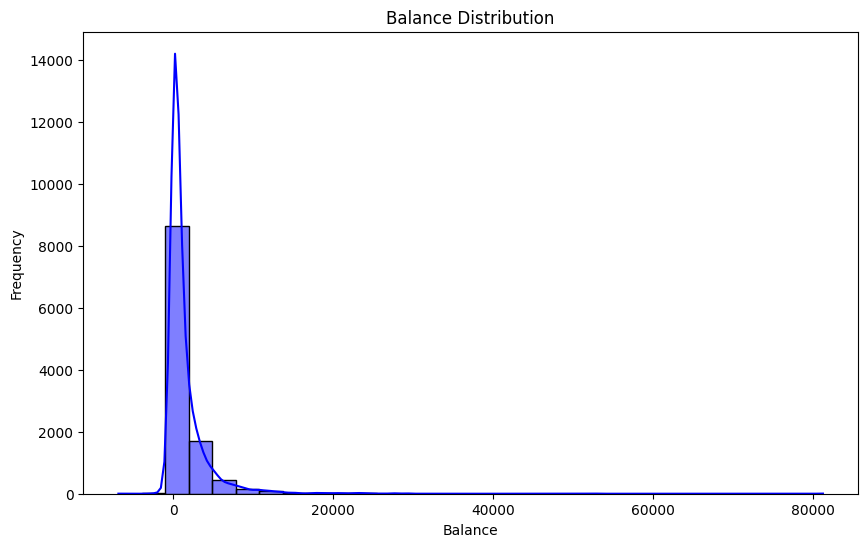

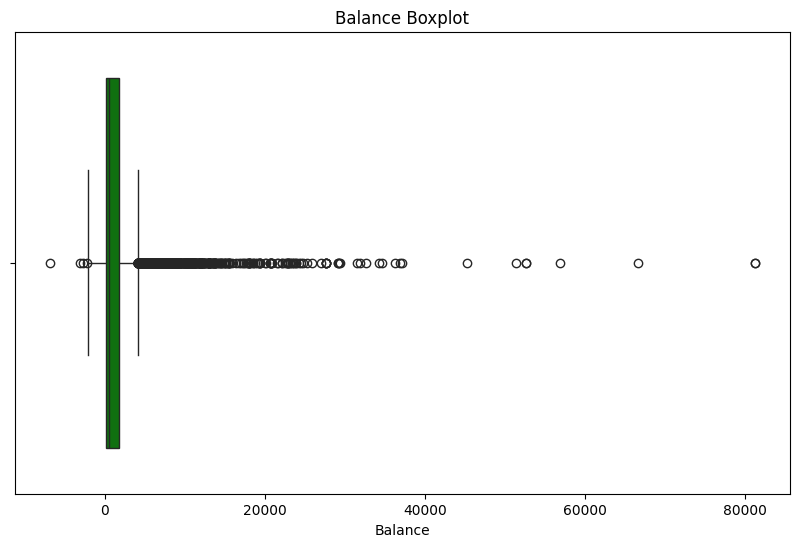

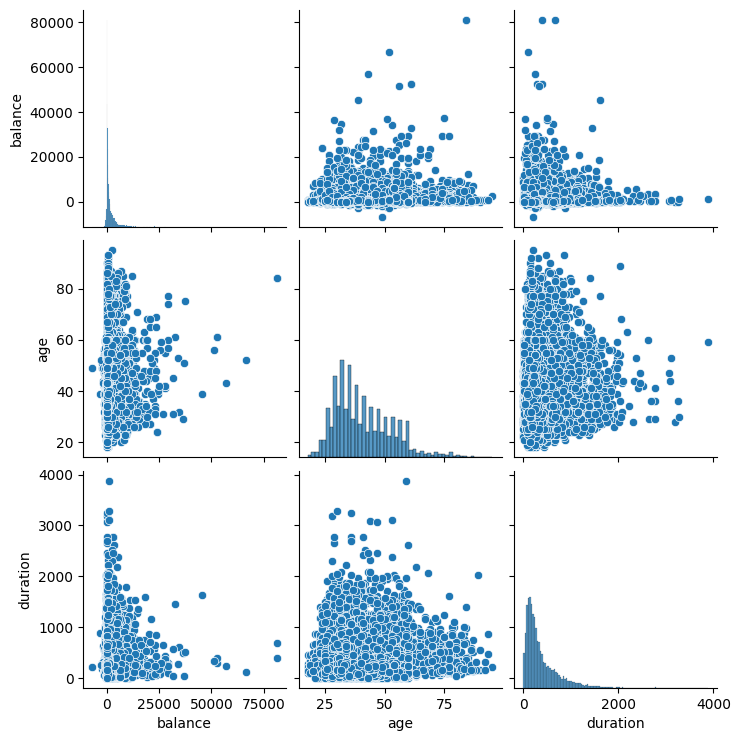

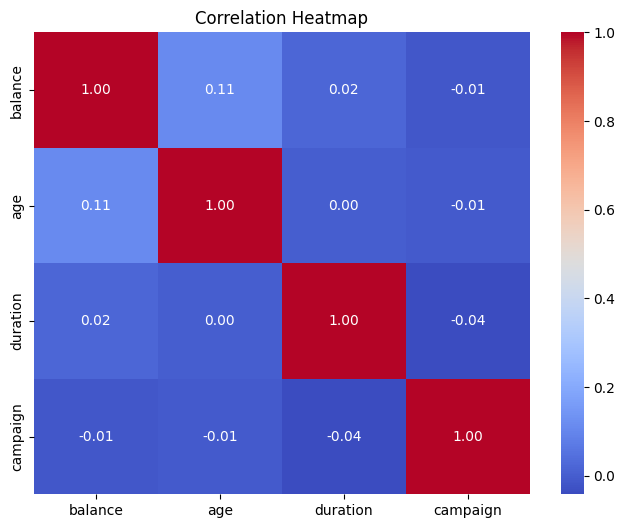

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame for visualization
df_pd = df.toPandas()

# 1. Histogram for a numerical column (e.g., balance)
plt.figure(figsize=(10, 6))
sns.histplot(df_pd['balance'], kde=True, bins=30, color='blue')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

# 2. Boxplot to see spread and outliers for the balance
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_pd['balance'], color='green')
plt.title('Balance Boxplot')
plt.xlabel('Balance')
plt.show()

# 3. Pairplot to inspect relationships between multiple numerical columns
sns.pairplot(df_pd[['balance', 'age', 'duration']])
plt.show()

# 4. Correlation heatmap for numerical columns
corr = df_pd[['balance', 'age', 'duration', 'campaign']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


2. e. Who is the client with the biggest balance?

In [29]:
df.orderBy(df["balance"].desc()).show(1, truncate=False)


+---+-------+-------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+-------+
|age|job    |marital|education|default|balance|housing|loan|contact  |day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+-------+-------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+-------+
|84 |retired|married|secondary|no     |81204  |no     |no  |telephone|1  |apr  |390     |1       |94   |3       |success |yes    |
+---+-------+-------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+-------+
only showing top 1 row



2. f. What is the proportion of clients who's balance is more than twice the average?

2. g. Do people with higher education have a better chance to deposit?

2. h. What are the best predictors for deposit?

In [6]:
df.orderBy('age').show(10, truncate=False)

+---+-------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+-------+
|age|job    |marital|education|default|balance|housing|loan|contact |day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+-------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+-------+
|18 |student|single |unknown  |no     |108    |no     |no  |cellular|10 |aug  |167     |1       |-1   |0       |unknown |yes    |
|18 |student|single |primary  |no     |608    |no     |no  |cellular|12 |aug  |267     |1       |-1   |0       |unknown |yes    |
|18 |student|single |unknown  |no     |108    |no     |no  |cellular|8  |sep  |169     |1       |-1   |0       |unknown |yes    |
|18 |student|single |primary  |no     |608    |no     |no  |cellular|13 |nov  |210     |1       |93   |1       |success |yes    |
|18 |student|single |unknown  |no     |108    |no     |no  |cellular|9  |feb  |92      |1 